In [281]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
from pprint import pprint
import matplotlib.pyplot as plt

In [282]:
#MAPS
import gmaps

# Google developer API key
from config import gkey

# Access maps with unique API key
gmaps.configure(api_key=gkey)

In [283]:
# csv file path
df = "/Users/berelieta/Documents/HWBootcamp/project1/Resources/Fecha_defuncion.csv"

# Import csv file as a DataFrame
df = pd.read_csv(df,low_memory=False)
#Filtrar solo por muertes de coronavirus
dfcovid = df.drop(df[df['RESULTADO'] != 1].index)
dfcovid.head()

,RESULTADO,FECHA_DEF,ID_REGISTRO,SEXO,ENTIDAD_RES,MUNICIPIO_RES,FECHA_INGRESO,FECHA_SINTOMAS,EDAD,Sintomas a hospitalizacion,Sintomas a Defuncion
0,1,2020-06-18,02b80a,Mujer,MÉXICO,106,2020-06-12,2020-06-08,54,4 days 00:00:00.000000000,10 days 00:00:00.000000000
1,1,2020-05-02,1020c0,Mujer,JALISCO,39,2020-03-20,2020-03-20,56,0 days 00:00:00.000000000,43 days 00:00:00.000000000
2,1,2020-04-23,1a6201,Mujer,MÉXICO,121,2020-04-20,2020-04-20,78,0 days 00:00:00.000000000,3 days 00:00:00.000000000
3,1,2020-04-13,00c191,Mujer,CIUDAD DE MÉXICO,11,2020-04-07,2020-03-30,48,8 days 00:00:00.000000000,14 days 00:00:00.000000000
4,1,2020-07-16,1d8f4a,Mujer,BAJA CALIFORNIA,2,2020-06-26,2020-06-24,69,2 days 00:00:00.000000000,22 days 00:00:00.000000000


In [284]:
gender_df= dfcovid.groupby(["ENTIDAD_RES", "SEXO"])[['ENTIDAD_RES','SEXO']].count() 
gender_df =dfcovid.groupby(["ENTIDAD_RES", "SEXO"]).size().reset_index(name='NUM')

gender_df

,ENTIDAD_RES,SEXO,NUM
0,AGUASCALIENTES,Hombre,109
1,AGUASCALIENTES,Mujer,133
2,BAJA CALIFORNIA,Hombre,1014
3,BAJA CALIFORNIA,Mujer,1587
4,BAJA CALIFORNIA SUR,Hombre,68
...,...,...,...
59,VERACRUZ DE IGNACIO DE LA LLAVE,Mujer,1741
60,YUCATÁN,Hombre,278
61,YUCATÁN,Mujer,545
62,ZACATECAS,Hombre,88


In [286]:
cities = dfcovid["ENTIDAD_RES"].unique()

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

column_names = ["City","Lat","Lng"]
results = []

def k_to_f(k):
    return 9 / 5 * (k - 273) + 32

print("""Beginning Data Retrieval-----------------------------""")


# Build query URL
for index, city in enumerate(cities, start=1):
    print(f'Processing Record {index} of {len(cities)} | {city}')
    city_data = []
    # Build query URL
    query_url = url + "appid=" + api_key + "&q=" + city + ',mx'
    
    weather_response = requests.get(query_url, city).json()
    
    if weather_response.get("cod") and weather_response.get("cod") == '404':
        print(f'{city} not found. Skipping...')
        continue
    
    try:
        city_data.append(city)                                           # Append City name 
        city_data.append(weather_response["coord"]["lat"])               # Append City Lat
        city_data.append(weather_response["coord"]["lon"])               # Append City Long
        # Append city data to full data
        results.append(city_data)
        
    except:
        print(f'Unexpected issue with {city}: {weather_response}')

Beginning Data Retrieval-----------------------------
Processing Record 1 of 32 | MÉXICO
Processing Record 2 of 32 | JALISCO
Processing Record 3 of 32 | CIUDAD DE MÉXICO
Processing Record 4 of 32 | BAJA CALIFORNIA
Processing Record 5 of 32 | QUINTANA ROO
Processing Record 6 of 32 | NUEVO LEÓN
Processing Record 7 of 32 | NAYARIT
Processing Record 8 of 32 | SINALOA
Processing Record 9 of 32 | MICHOACÁN DE OCAMPO
Processing Record 10 of 32 | YUCATÁN
Processing Record 11 of 32 | COAHUILA DE ZARAGOZA
Processing Record 12 of 32 | TABASCO
Processing Record 13 of 32 | TLAXCALA
Processing Record 14 of 32 | VERACRUZ DE IGNACIO DE LA LLAVE
VERACRUZ DE IGNACIO DE LA LLAVE not found. Skipping...
Processing Record 15 of 32 | HIDALGO
Processing Record 16 of 32 | SONORA
Processing Record 17 of 32 | CHIHUAHUA
Processing Record 18 of 32 | TAMAULIPAS
Processing Record 19 of 32 | CHIAPAS
Processing Record 20 of 32 | PUEBLA
Processing Record 21 of 32 | GUERRERO
Processing Record 22 of 32 | COLIMA
Processin

In [287]:
# Converting to dataframe 
df = pd.DataFrame(results, columns=column_names)
df

,City,Lat,Lng
0,MÉXICO,19.43,-99.13
1,JALISCO,20.33,-103.67
2,CIUDAD DE MÉXICO,19.43,-99.13
3,BAJA CALIFORNIA,16.75,-97.50
4,QUINTANA ROO,19.67,-88.50
5,NUEVO LEÓN,25.67,-100.00
6,NAYARIT,22.00,-105.00
7,SINALOA,25.00,-107.50
8,MICHOACÁN DE OCAMPO,19.17,-101.83
9,YUCATÁN,20.83,-89.00


In [288]:
# Count how many covid have occured each state
mun_counts = dfcovid["ENTIDAD_RES"].value_counts().rename_axis('City').reset_index(name='Casos')

mun_counts = mun_counts[mun_counts.City != 'VERACRUZ DE IGNACIO DE LA LLAVE']

mun_counts

,City,Casos
0,MÉXICO,7908
1,CIUDAD DE MÉXICO,7109
3,BAJA CALIFORNIA,2601
4,PUEBLA,2268
5,SINALOA,2074
6,TABASCO,1852
7,SONORA,1796
8,JALISCO,1454
9,GUERRERO,1380
10,NUEVO LEÓN,964


In [289]:
merge_df = pd.merge(df,mun_counts, on="City", how="outer").sort_values(by=['City'])
merge_df

,City,Lat,Lng,Casos
25,AGUASCALIENTES,21.88,-102.30,242
3,BAJA CALIFORNIA,16.75,-97.50,2601
30,BAJA CALIFORNIA SUR,25.83,-111.83,155
29,CAMPECHE,19.00,-90.50,446
17,CHIAPAS,16.50,-92.50,941
15,CHIHUAHUA,28.50,-106.00,871
2,CIUDAD DE MÉXICO,19.43,-99.13,7109
10,COAHUILA DE ZARAGOZA,27.33,-102.00,590
20,COLIMA,19.17,-104.00,180
24,DURANGO,24.83,-104.83,272


In [290]:
locations = merge_df[["Lat", "Lng"]]
humidity = merge_df["Casos"]

fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=5)
fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

<Figure size 432x288 with 0 Axes>

# GRAFICA DE CASOS  POR ESTADO

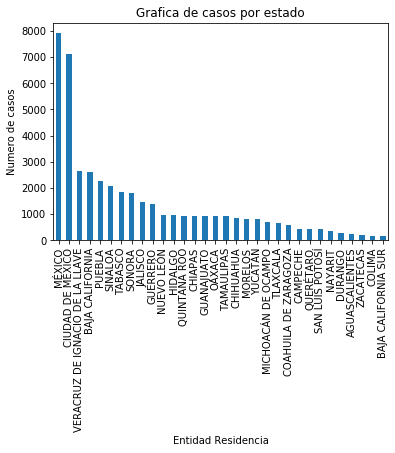

In [291]:
a = dfcovid["ENTIDAD_RES"].value_counts()
%matplotlib inline
a.plot(kind='bar')

plt.xlabel("Entidad Residencia")
plt.ylabel("Numero de casos")
plt.title("Grafica de casos por estado")

#Save image
plt.savefig("Resources/covidMX.png")

plt.show()

In [219]:
# Count how many covid have occured each state
mun_counts = dfcovid["ENTIDAD_RES"].value_counts()
mun_counts

MÉXICO                             7908
CIUDAD DE MÉXICO                   7109
VERACRUZ DE IGNACIO DE LA LLAVE    2661
BAJA CALIFORNIA                    2601
PUEBLA                             2268
SINALOA                            2074
TABASCO                            1852
SONORA                             1796
JALISCO                            1454
GUERRERO                           1380
NUEVO LEÓN                          964
HIDALGO                             963
QUINTANA ROO                        947
CHIAPAS                             941
GUANAJUATO                          924
OAXACA                              918
TAMAULIPAS                          914
CHIHUAHUA                           871
MORELOS                             825
YUCATÁN                             823
MICHOACÁN DE OCAMPO                 708
TLAXCALA                            672
COAHUILA DE ZARAGOZA                590
CAMPECHE                            446
QUERÉTARO                           426


In [220]:
# Count how many covid have occured each state
mun_counts = dfcovid["ENTIDAD_RES"].value_counts()
mun_counts

MÉXICO                             7908
CIUDAD DE MÉXICO                   7109
VERACRUZ DE IGNACIO DE LA LLAVE    2661
BAJA CALIFORNIA                    2601
PUEBLA                             2268
SINALOA                            2074
TABASCO                            1852
SONORA                             1796
JALISCO                            1454
GUERRERO                           1380
NUEVO LEÓN                          964
HIDALGO                             963
QUINTANA ROO                        947
CHIAPAS                             941
GUANAJUATO                          924
OAXACA                              918
TAMAULIPAS                          914
CHIHUAHUA                           871
MORELOS                             825
YUCATÁN                             823
MICHOACÁN DE OCAMPO                 708
TLAXCALA                            672
COAHUILA DE ZARAGOZA                590
CAMPECHE                            446
QUERÉTARO                           426


# CDMX

In [221]:
# clean municipios from cdmx
dfcovid = dfcovid.loc[dfcovid["ENTIDAD_RES"] == "CIUDAD DE MÉXICO", :]
dfcovid["MUNICIPIO_RES"] = dfcovid["MUNICIPIO_RES"].replace([11,5,12,2,13,7,15,16,17,3,6,10,14,4,8,9,999],['TLÁHUAC','GUSTAVO A. MADERO','TLALPAN','AZCAPOTZALCO','XOCHIMILCO','IZTAPALAPA','CUAUHTÉMOC','MIGUEL HIDALGO','VENUSTIANO CARRANZA','COYOACÁN','IZTACALCO','ÁLVARO OBREGÓN','BENITO JUÁREZ','CUAJIMALPA DE MORELOS','LA MAGDALENA CONTRERAS','MILPA ALTA','NO ESPECIFICADO'])
dfcovid.head()

,RESULTADO,FECHA_DEF,ID_REGISTRO,SEXO,ENTIDAD_RES,MUNICIPIO_RES,FECHA_INGRESO,FECHA_SINTOMAS,EDAD,Sintomas a hospitalizacion,Sintomas a Defuncion
3,1,2020-04-13,00c191,Mujer,CIUDAD DE MÉXICO,TLÁHUAC,2020-04-07,2020-03-30,48,8 days 00:00:00.000000000,14 days 00:00:00.000000000
7,1,2020-06-24,13e187,Mujer,CIUDAD DE MÉXICO,GUSTAVO A. MADERO,2020-06-23,2020-06-14,46,9 days 00:00:00.000000000,10 days 00:00:00.000000000
11,1,2020-04-26,0a1ca3,Mujer,CIUDAD DE MÉXICO,GUSTAVO A. MADERO,2020-04-19,2020-04-13,35,6 days 00:00:00.000000000,13 days 00:00:00.000000000
13,1,2020-05-02,010a3e,Hombre,CIUDAD DE MÉXICO,TLALPAN,2020-04-29,2020-04-18,69,11 days 00:00:00.000000000,14 days 00:00:00.000000000
14,1,2020-05-11,1b4884,Mujer,CIUDAD DE MÉXICO,AZCAPOTZALCO,2020-05-01,2020-05-01,51,0 days 00:00:00.000000000,10 days 00:00:00.000000000


In [222]:
# new df from cdmx
cdmx_df = dfcovid.loc[dfcovid["ENTIDAD_RES"]=="CIUDAD DE MÉXICO"]
cdmx_df

,RESULTADO,FECHA_DEF,ID_REGISTRO,SEXO,ENTIDAD_RES,MUNICIPIO_RES,FECHA_INGRESO,FECHA_SINTOMAS,EDAD,Sintomas a hospitalizacion,Sintomas a Defuncion
3,1,2020-04-13,00c191,Mujer,CIUDAD DE MÉXICO,TLÁHUAC,2020-04-07,2020-03-30,48,8 days 00:00:00.000000000,14 days 00:00:00.000000000
7,1,2020-06-24,13e187,Mujer,CIUDAD DE MÉXICO,GUSTAVO A. MADERO,2020-06-23,2020-06-14,46,9 days 00:00:00.000000000,10 days 00:00:00.000000000
11,1,2020-04-26,0a1ca3,Mujer,CIUDAD DE MÉXICO,GUSTAVO A. MADERO,2020-04-19,2020-04-13,35,6 days 00:00:00.000000000,13 days 00:00:00.000000000
13,1,2020-05-02,010a3e,Hombre,CIUDAD DE MÉXICO,TLALPAN,2020-04-29,2020-04-18,69,11 days 00:00:00.000000000,14 days 00:00:00.000000000
14,1,2020-05-11,1b4884,Mujer,CIUDAD DE MÉXICO,AZCAPOTZALCO,2020-05-01,2020-05-01,51,0 days 00:00:00.000000000,10 days 00:00:00.000000000
...,...,...,...,...,...,...,...,...,...,...,...
55682,1,2020-07-21,0f15b1,Hombre,CIUDAD DE MÉXICO,IZTAPALAPA,2020-07-18,2020-07-12,69,6 days 00:00:00.000000000,9 days 00:00:00.000000000
55687,1,2020-07-08,06c938,Hombre,CIUDAD DE MÉXICO,IZTAPALAPA,2020-07-03,2020-07-03,63,0 days 00:00:00.000000000,5 days 00:00:00.000000000
55729,1,2020-07-19,11f0d3,Mujer,CIUDAD DE MÉXICO,AZCAPOTZALCO,2020-07-16,2020-07-10,77,6 days 00:00:00.000000000,9 days 00:00:00.000000000
55747,1,2020-07-13,190bc8,Mujer,CIUDAD DE MÉXICO,IZTAPALAPA,2020-07-13,2020-07-04,63,9 days 00:00:00.000000000,9 days 00:00:00.000000000


In [223]:
# Count mortality in CDMX
gender_df = pd.DataFrame(cdmx_df["SEXO"].value_counts())
gender_df.head()

,SEXO
Mujer,4780
Hombre,2329


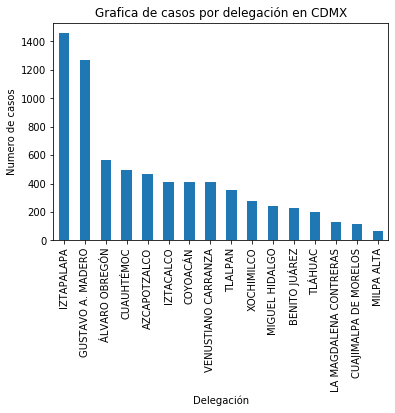

In [279]:
# GRAFICA DE CASOS POR DELEGACION

a = cdmx_df["MUNICIPIO_RES"].value_counts()
%matplotlib inline
a.plot(kind='bar')

plt.xlabel("Delegación")
plt.ylabel("Numero de casos")
plt.title("Grafica de casos por delegación en CDMX")

#Save image
plt.savefig("Resources/covidCDMX.png")

plt.show()

In [225]:
cities = dfcovid["MUNICIPIO_RES"].unique()

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

column_names = ["City","Lat","Lng"]
results = []

def k_to_f(k):
    return 9 / 5 * (k - 273) + 32

print("""Beginning Data Retrieval-----------------------------""")


# Build query URL
for index, city in enumerate(cities, start=1):
    print(f'Processing Record {index} of {len(cities)} | {city}')
    cdmx_data = []
    # Build query URL
    query_url = url + "appid=" + api_key + "&q=" + city + ',mx'
    
    weather_response = requests.get(query_url, city).json()
    
    if weather_response.get("cod") and weather_response.get("cod") == '404':
        print(f'{city} not found. Skipping...')
        continue
    
    try:
        cdmx_data.append(city)                                           # Append City name 
        cdmx_data.append(weather_response["coord"]["lat"])               # Append City Lat
        cdmx_data.append(weather_response["coord"]["lon"])               # Append City Long
        # Append city data to full data
        results.append(cdmx_data)
        
    except:
        print(f'Unexpected issue with {city}: {weather_response}')

Beginning Data Retrieval-----------------------------
Processing Record 1 of 16 | TLÁHUAC
Processing Record 2 of 16 | GUSTAVO A. MADERO
Processing Record 3 of 16 | TLALPAN
Processing Record 4 of 16 | AZCAPOTZALCO
Processing Record 5 of 16 | XOCHIMILCO
Processing Record 6 of 16 | IZTAPALAPA
Processing Record 7 of 16 | CUAUHTÉMOC
Processing Record 8 of 16 | MIGUEL HIDALGO
Processing Record 9 of 16 | VENUSTIANO CARRANZA
Processing Record 10 of 16 | COYOACÁN
Processing Record 11 of 16 | IZTACALCO
Processing Record 12 of 16 | ÁLVARO OBREGÓN
Processing Record 13 of 16 | BENITO JUÁREZ
Processing Record 14 of 16 | CUAJIMALPA DE MORELOS
Processing Record 15 of 16 | LA MAGDALENA CONTRERAS
Processing Record 16 of 16 | MILPA ALTA


In [226]:
# Converting to dataframe 
df = pd.DataFrame(results, columns=column_names)
df

,City,Lat,Lng
0,TLÁHUAC,19.27,-99.00
1,GUSTAVO A. MADERO,19.48,-99.10
2,TLALPAN,19.28,-99.17
3,AZCAPOTZALCO,19.49,-99.18
4,XOCHIMILCO,19.26,-99.11
5,IZTAPALAPA,19.35,-99.05
6,CUAUHTÉMOC,28.41,-106.87
7,MIGUEL HIDALGO,19.42,-99.20
8,VENUSTIANO CARRANZA,19.43,-99.10
9,COYOACÁN,19.33,-99.16


In [227]:
# Count how many covid have occured each state
del_counts = dfcovid["MUNICIPIO_RES"].value_counts().rename_axis('City').reset_index(name='Casos')

del_counts

,City,Casos
0,IZTAPALAPA,1457
1,GUSTAVO A. MADERO,1269
2,ÁLVARO OBREGÓN,565
3,CUAUHTÉMOC,498
4,AZCAPOTZALCO,469
5,IZTACALCO,413
6,COYOACÁN,411
7,VENUSTIANO CARRANZA,409
8,TLALPAN,358
9,XOCHIMILCO,280


In [228]:
merge_cdmx = pd.merge(df,del_counts, on="City", how="outer").sort_values(by=['City'])
merge_cdmx

,City,Lat,Lng,Casos
3,AZCAPOTZALCO,19.49,-99.18,469
12,BENITO JUÁREZ,19.37,-99.16,230
9,COYOACÁN,19.33,-99.16,411
13,CUAJIMALPA DE MORELOS,19.36,-99.29,117
6,CUAUHTÉMOC,28.41,-106.87,498
1,GUSTAVO A. MADERO,19.48,-99.10,1269
10,IZTACALCO,19.40,-99.08,413
5,IZTAPALAPA,19.35,-99.05,1457
14,LA MAGDALENA CONTRERAS,19.30,-99.24,131
7,MIGUEL HIDALGO,19.42,-99.20,239


In [229]:
locations = merge_cdmx[["Lat", "Lng"]]
covid_rate = merge_cdmx["Casos"]

In [278]:
# Create a marker_layer using the poverty list to fill the info box
fig = gmaps.figure()
markers = gmaps.marker_layer(locations,
    info_box_content=[f"count: {rate}" for rate in covid_rate])
fig.add_layer(markers)

fig

Figure(layout=FigureLayout(height='420px'))

<Figure size 432x288 with 0 Axes>

In [231]:
gender_df= cdmx_df.groupby(["MUNICIPIO_RES", "SEXO"])[['MUNICIPIO_RES','SEXO']].count() 
gender_df =cdmx_df.groupby(["MUNICIPIO_RES", "SEXO"]).size().reset_index(name='NUM')
gender_df

,MUNICIPIO_RES,SEXO,NUM
0,AZCAPOTZALCO,Hombre,144
1,AZCAPOTZALCO,Mujer,325
2,BENITO JUÁREZ,Hombre,69
3,BENITO JUÁREZ,Mujer,161
4,COYOACÁN,Hombre,143
5,COYOACÁN,Mujer,268
6,CUAJIMALPA DE MORELOS,Hombre,49
7,CUAJIMALPA DE MORELOS,Mujer,68
8,CUAUHTÉMOC,Hombre,162
9,CUAUHTÉMOC,Mujer,336


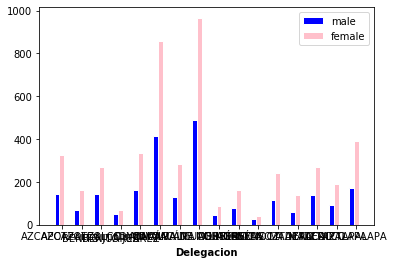

In [277]:
#arrays
delegaciones = gender_df["MUNICIPIO_RES"].to_list()

# set width of bar
barWidth = 0.25
 
# set height of bar
males = gender_df[gender_df.SEXO == 'Hombre']
bars1 = males['NUM'].to_list()

females = gender_df[gender_df.SEXO == 'Mujer']
bars2 = females['NUM'].to_list()
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='male')
plt.bar(r2, bars2, color='pink', width=barWidth, edgecolor='white', label='female')
 
# Add xticks on the middle of the group bars
plt.xlabel('Delegacion', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], delegaciones)

#Save image
plt.savefig("Resources/GenderCDMX.png")
 
# Create legend & Show graphic
plt.legend()
plt.show()
